## Exploratory Data Analysis

#### Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for UAE Data Analyst Roles

In [10]:
df_DA_UAE = df[(df['job_country'] == 'United Arab Emirates') & (df['job_title_short'] == 'Data Analyst')]

df_DA_UAE

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
510,Data Analyst,"Data Analyst / Data Scientist (Remote), nybl -...",Dubai - United Arab Emirates,via Qureos,Full-time,False,United Arab Emirates,2023-02-19 13:25:20,False,False,United Arab Emirates,None,NaN,NaN,Qureos,"[python, r, sql, c, c#, java, javascript, hado...","{'libraries': ['hadoop', 'spark', 'react'], 'p..."
783,Data Analyst,"Data Analyst ( Retail ), GGI Entertainment - P...",Dubai - United Arab Emirates,via Qureos,Full-time,False,United Arab Emirates,2023-02-19 13:25:20,False,False,United Arab Emirates,None,NaN,NaN,Qureos,[excel],{'analyst_tools': ['excel']}
841,Data Analyst,Data Analyst,Fujairah - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-09-20 13:21:34,True,False,United Arab Emirates,None,NaN,NaN,Work in USA,"[python, r]","{'programming': ['python', 'r']}"
1179,Data Analyst,Data Analyst,Dubai - United Arab Emirates,via Trabajo.org,Full-time,False,United Arab Emirates,2023-12-03 13:13:40,True,False,United Arab Emirates,None,NaN,NaN,Emarat Careers,None,None
1194,Data Analyst,Data Analyst,Dubai - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-06-29 13:17:40,True,False,United Arab Emirates,None,NaN,NaN,ConFlip,"[sql, python, r, oracle, hadoop, spark]","{'cloud': ['oracle'], 'libraries': ['hadoop', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782991,Data Analyst,Data Analyst,Abu Dhabi - United Arab Emirates,via LinkedIn,Full-time,False,United Arab Emirates,2023-05-02 06:23:46,True,False,United Arab Emirates,None,NaN,NaN,Confidential.,"[python, sql, pandas, numpy, pytorch, power bi]","{'analyst_tools': ['power bi'], 'libraries': [..."
783459,Data Analyst,Data Analyst,Ras Al-Khaimah - Ras al Khaimah - United Arab ...,via Trabajo.org,Full-time,False,United Arab Emirates,2023-08-13 06:26:28,False,False,United Arab Emirates,None,NaN,NaN,Work in USA,[sql],{'programming': ['sql']}
784178,Data Analyst,Data Analyst,United Arab Emirates,via Trabajo.org,Full-time,False,United Arab Emirates,2023-09-13 06:26:28,True,False,United Arab Emirates,None,NaN,NaN,Avanta Works,"[sql, oracle, excel]","{'analyst_tools': ['excel'], 'cloud': ['oracle..."
784511,Data Analyst,"Specialist, Hc Data Analytics",Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-01-11 06:49:58,False,False,United Arab Emirates,None,NaN,NaN,ADNOC,[sap],{'analyst_tools': ['sap']}


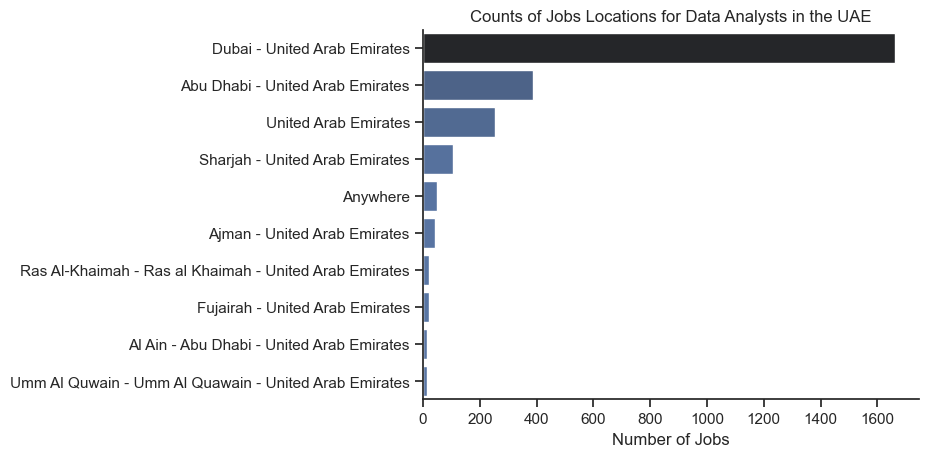

In [20]:
df_plot = df_DA_UAE['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #to remove the border around the chart
plt.title('Counts of Jobs Locations for Data Analysts in the UAE')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

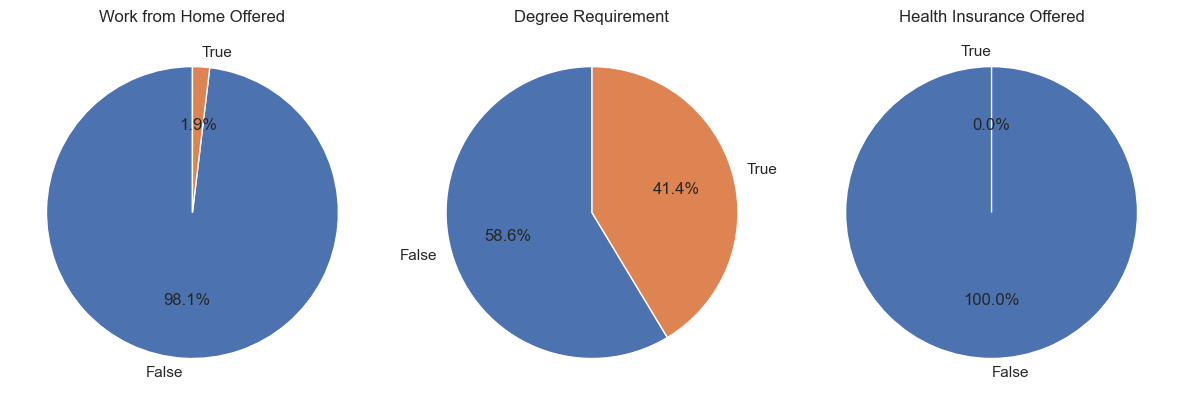

In [24]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):   
    counts = df_DA_UAE[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

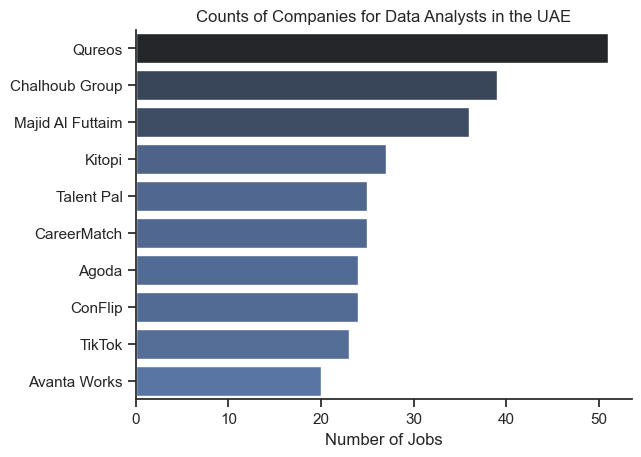

In [29]:
df_plot = df_DA_UAE['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #to remove the border around the chart
plt.title('Counts of Companies for Data Analysts in the UAE')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()